In [2]:
import pandas as pd
df = pd.read_csv("Sample - Superstore.csv", encoding="latin1")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.shape

(9994, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [27]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [40]:
df.duplicated().sum()

np.int64(0)

In [41]:
#if there is duplicate
#df[df.duplicated()]
#df = df.drop_duplicates()
#print("Remaining rows:", len(df))

In [11]:
df.describe(include='object')



,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,1334,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,35,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


EDA & Data Visualization


In [15]:
df['Profit_status'] = pd.cut(
    df['Profit'],
    bins=[df['Profit'].min()-1, 0, df['Profit'].max()],
    labels=['Loss', 'Gain']
)
df['Profit_status'].head()


0    Gain
1    Gain
2    Gain
3    Loss
4    Gain
Name: Profit_status, dtype: category
Categories (2, object): ['Loss' < 'Gain']

Pie Chart to see Count of each segment

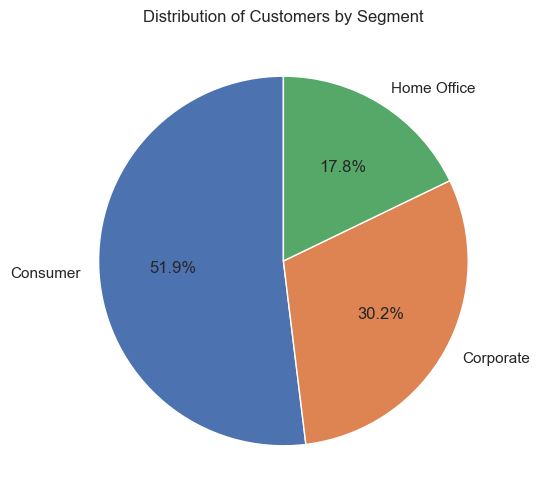

In [66]:
import matplotlib.pyplot as plt

# Count of each segment
segment_counts = df['Segment'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Customers by Segment')
plt.show()


categorical overview — quick visual summaries of key categorical fields to see which values dominate.

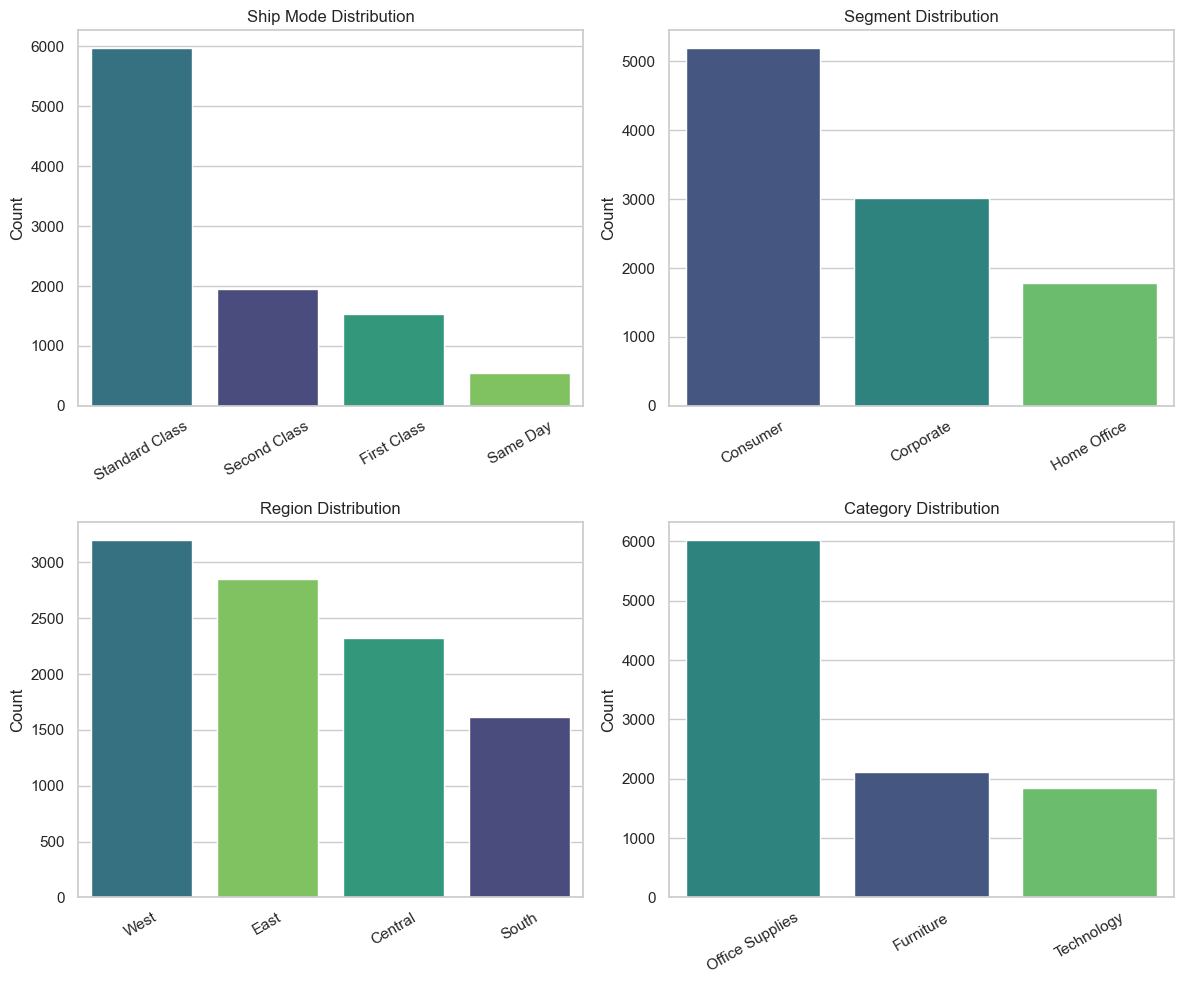

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

cat_columns = ['Ship Mode', 'Segment', 'Region', 'Category']

plt.figure(figsize=(12,10))

for i, col in enumerate(cat_columns, 1):
    plt.subplot(2, 2, i)
    order = df[col].value_counts().index
    sns.countplot(x=col, data=df, order=order, hue=col, palette='viridis', legend=False)
    plt.title(f'{col} Distribution')
    plt.ylabel('Count')
    plt.xlabel('')
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()


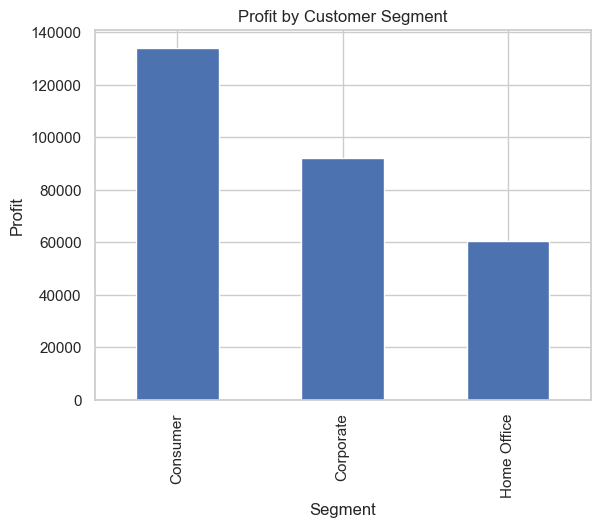

In [80]:
#Segment & Ship Mode Performance
# Profit by Segment
seg_profit = df.groupby('Segment')['Profit'].sum()
seg_profit.plot(kind='bar', title='Profit by Customer Segment')
plt.ylabel('Profit')
plt.show()


so Office Supplies is our dominant category in the dataset.
Let's look at:
📈 Profit by Sub-Category (within Office Supplies), or
🌍 Profit by Region (for Office Supplies)?

C:\Users\MAJID ALI\AppData\Local\Temp\ipykernel_8324\2648344114.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sub-Category', y='Profit', data=subcategory_profit, palette='coolwarm')


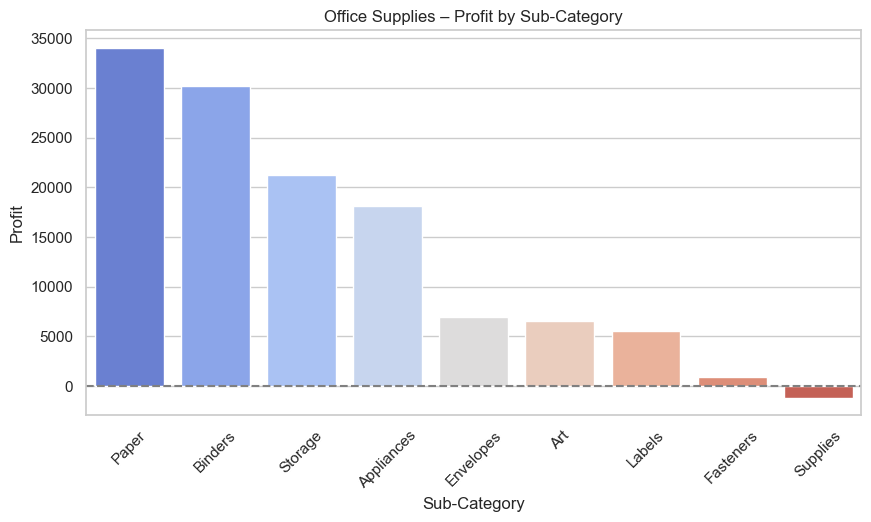

C:\Users\MAJID ALI\AppData\Local\Temp\ipykernel_8324\2648344114.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Profit', data=region_profit, palette='viridis')


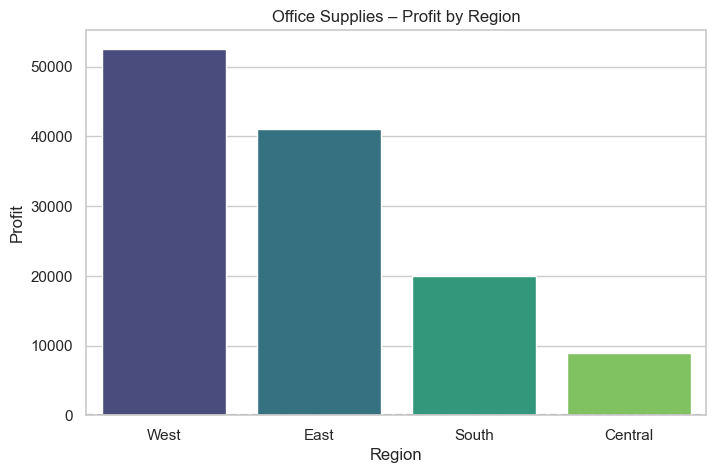

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for Office Supplies
office_df = df[df['Category'] == 'Office Supplies']

# --- 1️⃣ Profit by Sub-Category ---
subcategory_profit = office_df.groupby('Sub-Category', observed=True)['Profit'].sum().reset_index().sort_values('Profit', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='Sub-Category', y='Profit', data=subcategory_profit, palette='coolwarm')
plt.title('Office Supplies – Profit by Sub-Category')
plt.xticks(rotation=45)
plt.axhline(0, color='gray', linestyle='--')
plt.show()


# --- 2️⃣ Profit by Region ---
region_profit = office_df.groupby('Region', observed=True)['Profit'].sum().reset_index().sort_values('Profit', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Profit', data=region_profit, palette='viridis')
plt.title('Office Supplies – Profit by Region')
plt.axhline(0, color='gray', linestyle='--')
plt.show()


So, based on our finding:
“Paper” is the most profitable Sub-Category in Office Supplies.
“West” is the most profitable Region for Office Supplies.

We noticed that “Standard Class” shows up most often in our data,
Now Group by Ship Mode and sum up total Profit and Sales to see faster shipping (like Second Day or Same Day) would increase or decrease profit margins — and why?

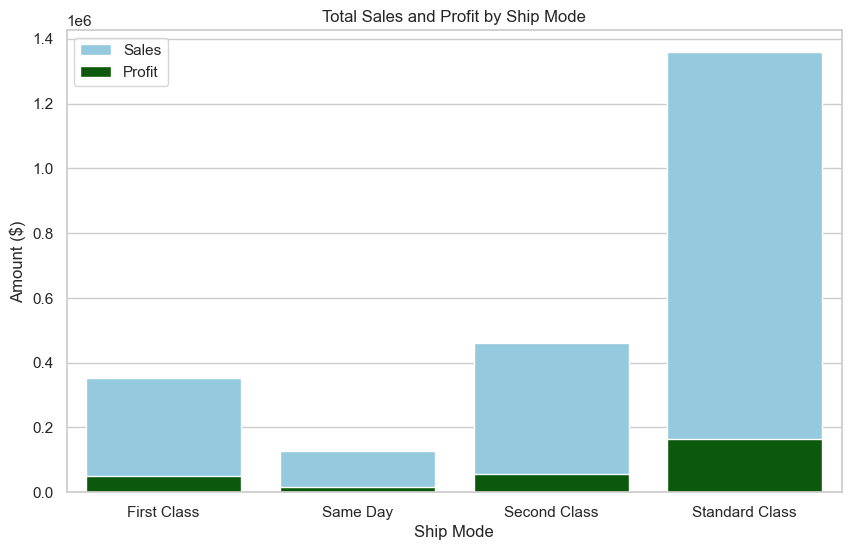

        Ship Mode         Sales       Profit
0     First Class  3.514284e+05   48969.8399
1        Same Day  1.283631e+05   15891.7589
2    Second Class  4.591936e+05   57446.6354
3  Standard Class  1.358216e+06  164088.7875


In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Group by Ship Mode ---
shipmode_summary = df.groupby('Ship Mode', observed=True)[['Sales', 'Profit']].sum().reset_index()

# --- Plot side-by-side Sales and Profit ---
plt.figure(figsize=(10,6))
sns.barplot(x='Ship Mode', y='Sales', data=shipmode_summary, color='skyblue', label='Sales')
sns.barplot(x='Ship Mode', y='Profit', data=shipmode_summary, color='darkgreen', label='Profit')

plt.title('Total Sales and Profit by Ship Mode')
plt.ylabel('Amount ($)')
plt.legend()
plt.show()

# --- Print numerical summary ---
print(shipmode_summary)


Perfect! Now we can interpret this clearly:

Standard Class dominates both Sales and Profit by a large margin:

Sales ≈ $1.36M

Profit ≈ $164k

Second Class comes next:

Sales ≈ $459k

Profit ≈ $57k

First Class and Same Day are smaller players.

💡 Insight: Most of your revenue and profit comes from Standard Class shipments, so any strategic changes (discounts, promotions, or logistics improvements) here will have the biggest impact

We could now drill down further — for example, look at top categories and products within Standard Class, or region-wise profit for Standard Class.

C:\Users\MAJID ALI\AppData\Local\Temp\ipykernel_8324\4150449107.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Sales', data=category_standard, palette='Blues_d')


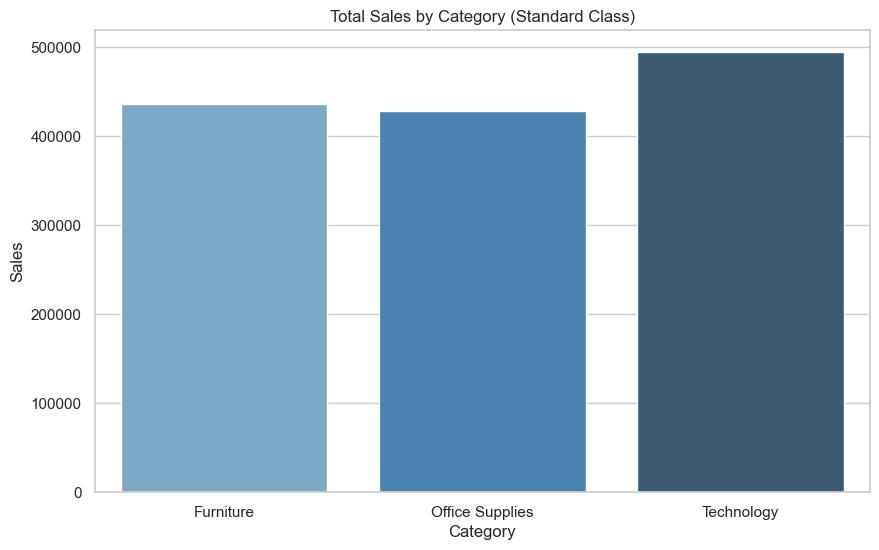

C:\Users\MAJID ALI\AppData\Local\Temp\ipykernel_8324\4150449107.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Profit', data=category_standard, palette='Greens_d')


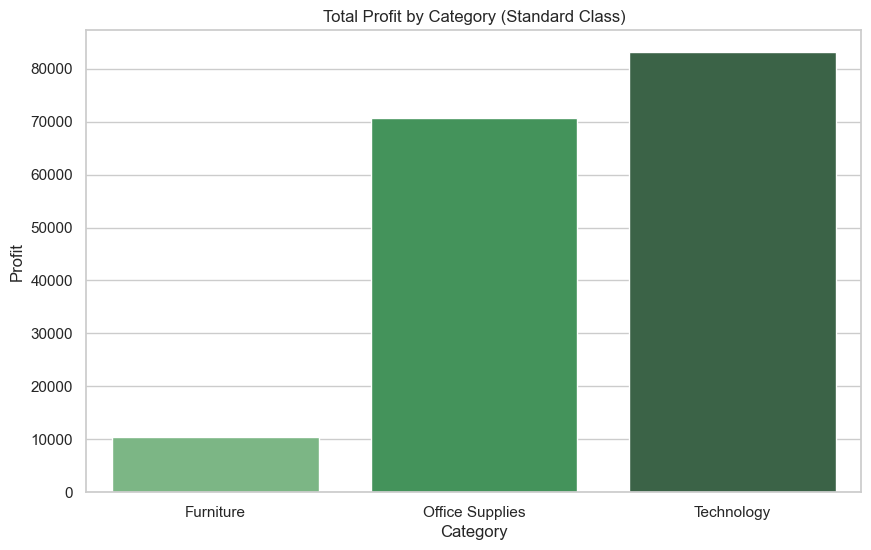

In [75]:
# Filter for Standard Class
standard_df = df[df['Ship Mode'] == 'Standard Class']

# Group by Category
category_standard = standard_df.groupby('Category', observed=True)[['Sales', 'Profit']].sum().reset_index()

# Plot Sales and Profit side by side
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Sales', data=category_standard, palette='Blues_d')
plt.title('Total Sales by Category (Standard Class)')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Profit', data=category_standard, palette='Greens_d')
plt.title('Total Profit by Category (Standard Class)')
plt.ylabel('Profit')
plt.show()


C:\Users\MAJID ALI\AppData\Local\Temp\ipykernel_8324\280538870.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sales', data=region_standard, palette='Blues_d')


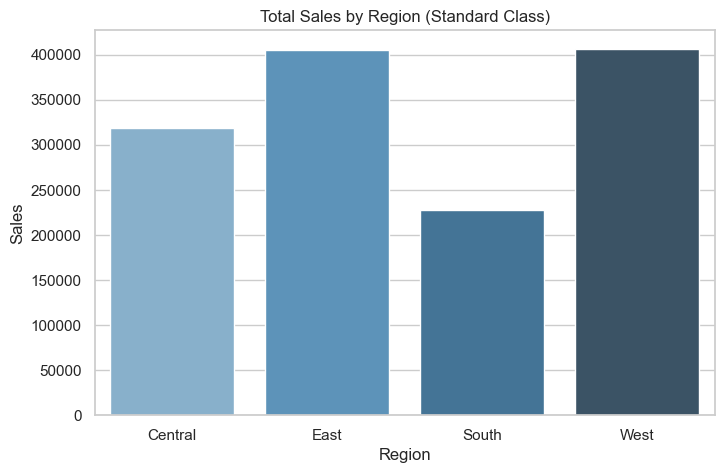

C:\Users\MAJID ALI\AppData\Local\Temp\ipykernel_8324\280538870.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Profit', data=region_standard, palette='Greens_d')


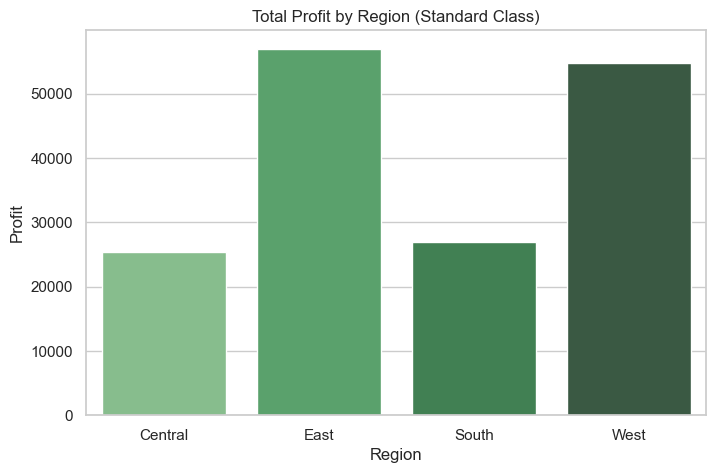

In [76]:
# Group by Region
region_standard = standard_df.groupby('Region', observed=True)[['Sales', 'Profit']].sum().reset_index()

# Plot Sales by Region
plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Sales', data=region_standard, palette='Blues_d')
plt.title('Total Sales by Region (Standard Class)')
plt.ylabel('Sales')
plt.show()

# Plot Profit by Region
plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Profit', data=region_standard, palette='Greens_d')
plt.title('Total Profit by Region (Standard Class)')
plt.ylabel('Profit')
plt.show()


Total sales and profit by year

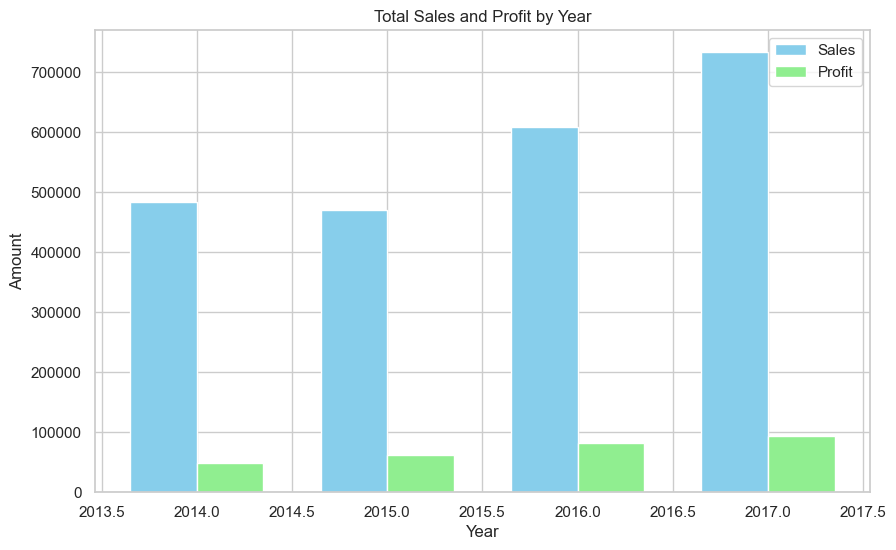

In [63]:
# total sales and profit by year
yearly_summary = df.groupby('year')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(10,6))
bar_width = 0.35
years = yearly_summary['year']

# Sales bars
plt.bar(years - bar_width/2, yearly_summary['Sales'], width=bar_width, color='skyblue', label='Sales')
# Profit bars
plt.bar(years + bar_width/2, yearly_summary['Profit'], width=bar_width, color='lightgreen', label='Profit')

plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Total Sales and Profit by Year')
plt.legend()
plt.show()



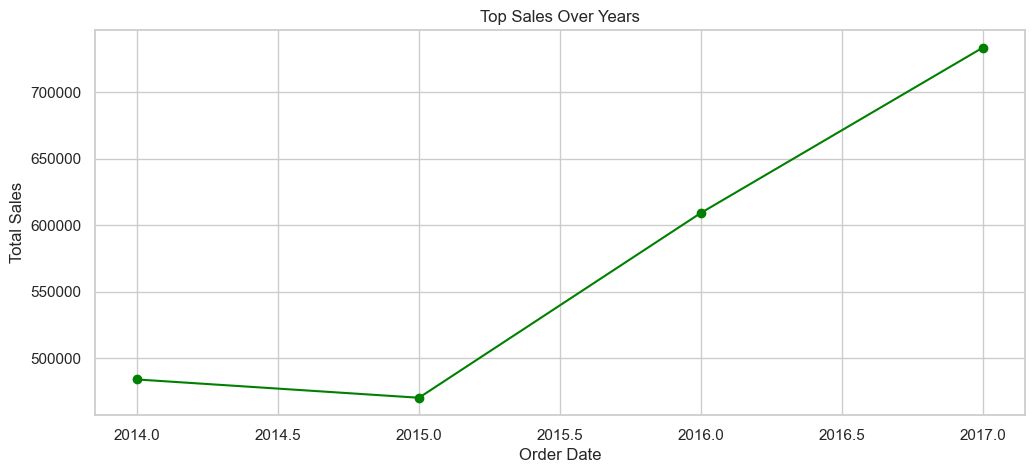

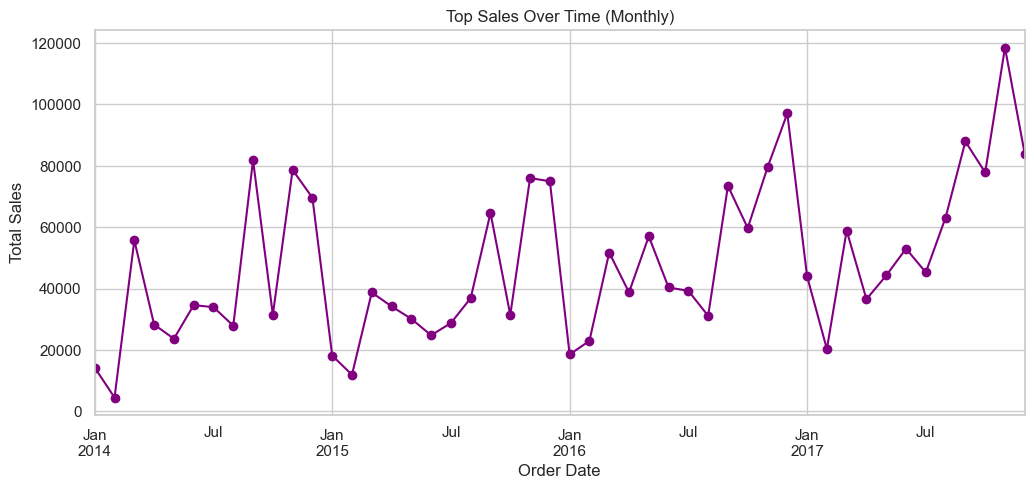

In [83]:
#Convert date columns into proper datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
(df['Ship Date'] < df['Order Date']).sum()
#Aggregate sales by month or year
sales_by_year = df.groupby(df['Order Date'].dt.year)['Sales'].sum()
sales_by_year
sales_by_month = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
sales_by_month
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
sales_by_year.plot(kind='line', marker='o', color='green')
plt.ylabel('Total Sales')
plt.title('Top Sales Over Years')
plt.grid(True)
plt.show()
plt.figure(figsize=(12,5))
sales_by_month.plot(kind='line', marker='o', color='purple')
plt.ylabel('Total Sales')
plt.title('Top Sales Over Time (Monthly)')
plt.grid(True)
plt.show()




Top & Bottom Categories

In [81]:
#Top & Bottom Categories
# 1  Top 5 categories by sales
top_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print("Top 5 Categories by Sales:\n", top_sales.head())

#2 Categories with lowest total profit
low_profit = df.groupby('Category')['Profit'].sum().sort_values()
print("Bottom Categories by Profit:\n", low_profit.head())

# 3. Where are we losing money?
df[df['Profit'] < 0].head()


Top 5 Categories by Sales:
 Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64
Bottom Categories by Profit:
 Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Profit_status,Processing_Time,Order_Month,Discount_Range,Profit_Status,year
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,957.5775,5,0.45,-383.0310,Loss,7,Oct,0.4–0.5,Loss,2015
14,15,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,68.8100,5,0.80,-123.8580,Loss,4,Nov,>0.5,Loss,2015
15,16,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,2.5440,3,0.80,-3.8160,Loss,4,Nov,>0.5,Loss,2015
23,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,71.3720,2,0.30,-1.0196,Loss,2,Jul,0.2–0.3,Loss,2017
27,28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,3083.4300,7,0.50,-1665.0522,Loss,4,Sep,0.4–0.5,Loss,2015


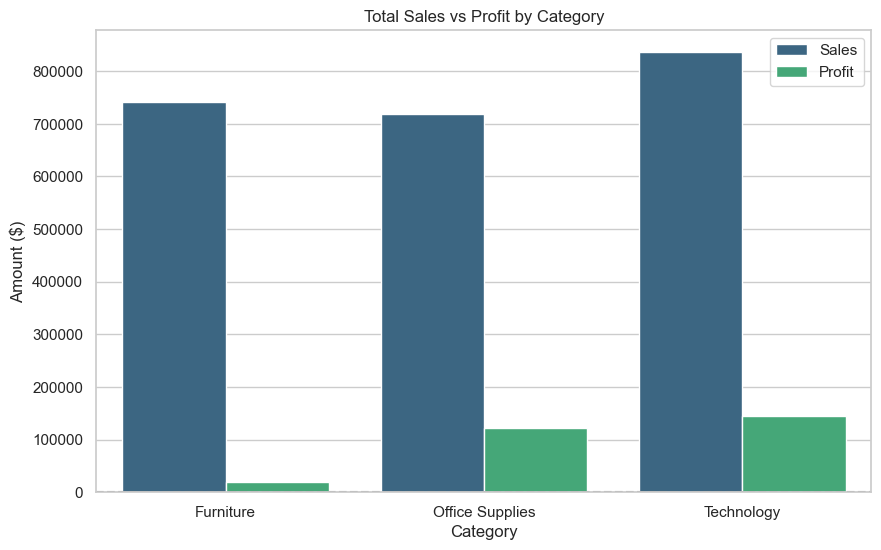

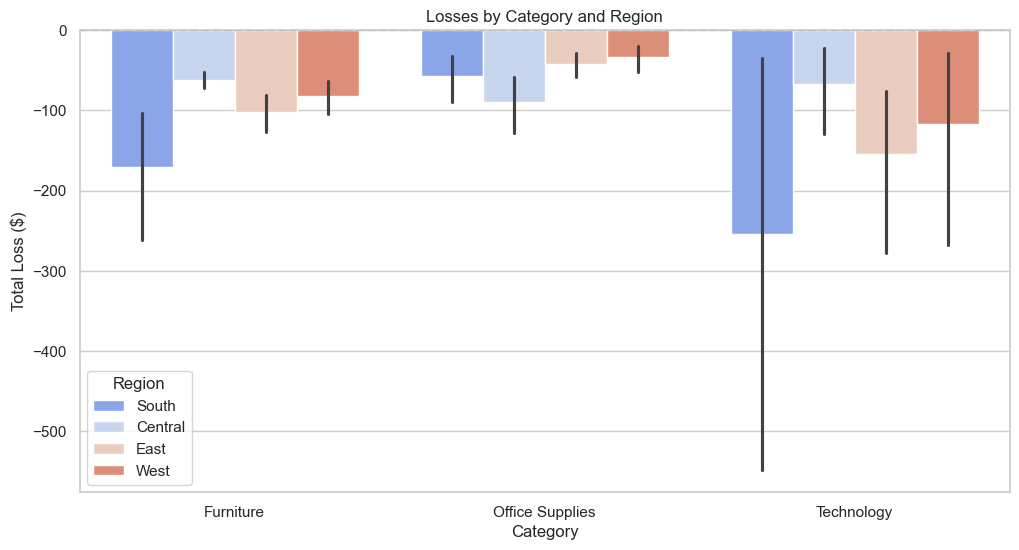

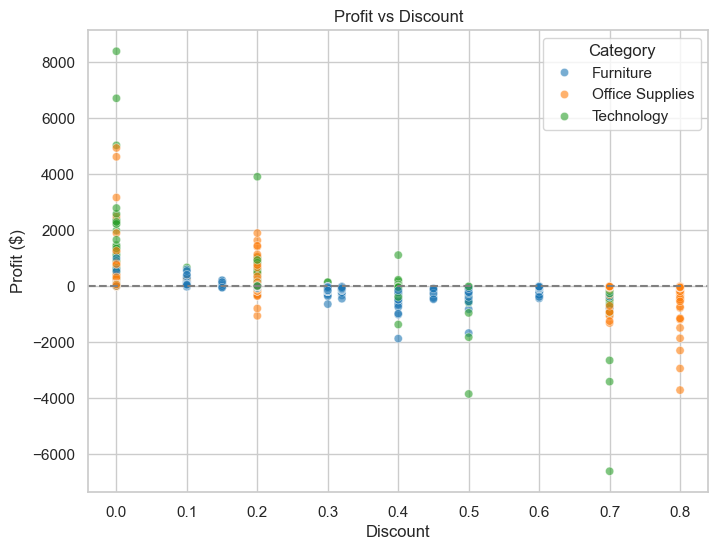

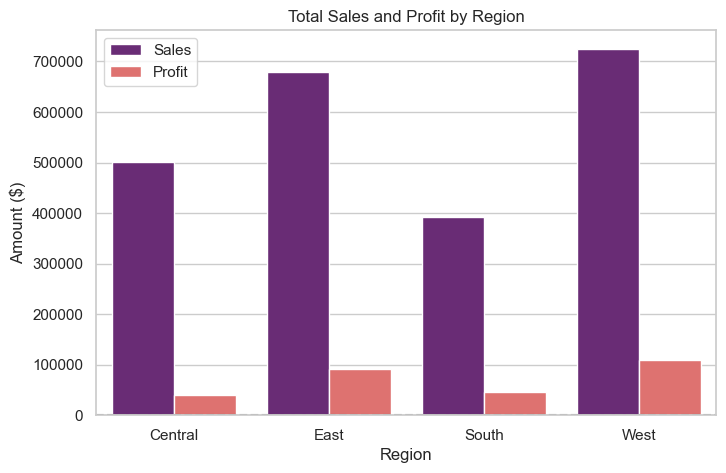

In [82]:
# 📊 COMPREHENSIVE PROFIT & LOSS DASHBOARD

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# ==========================
# 1️⃣ Sales vs Profit by Category
# ==========================
category_stats = df.groupby('Category', observed=True)[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(10,6))
category_stats_melt = category_stats.melt(id_vars='Category', value_vars=['Sales','Profit'], 
                                          var_name='Metric', value_name='Amount')
sns.barplot(x='Category', y='Amount', hue='Metric', data=category_stats_melt, palette='viridis')
plt.title('Total Sales vs Profit by Category')
plt.ylabel('Amount ($)')
plt.xlabel('Category')
plt.axhline(0, color='gray', linestyle='--')
plt.legend(title='')
plt.show()

# ==========================
# 2️⃣ Losses by Category & Region
# ==========================
loss_orders = df[df['Profit'] < 0]

plt.figure(figsize=(12,6))
sns.barplot(x='Category', y='Profit', hue='Region', data=loss_orders, palette='coolwarm')
plt.title('Losses by Category and Region')
plt.ylabel('Total Loss ($)')
plt.xlabel('Category')
plt.axhline(0, color='gray', linestyle='--')
plt.legend(title='Region')
plt.show()

# ==========================
# 3️⃣ Discount vs Profit Scatter
# ==========================
plt.figure(figsize=(8,6))
sns.scatterplot(x='Discount', y='Profit', data=df, alpha=0.6, hue='Category', palette='tab10')
plt.title('Profit vs Discount')
plt.ylabel('Profit ($)')
plt.xlabel('Discount')
plt.axhline(0, color='gray', linestyle='--')
plt.show()

# ==========================
# 4️⃣ Sales & Profit by Region
# ==========================
region_stats = df.groupby('Region', observed=True)[['Sales','Profit']].sum().reset_index()
region_stats_melt = region_stats.melt(id_vars='Region', value_vars=['Sales','Profit'], 
                                     var_name='Metric', value_name='Amount')

plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Amount', hue='Metric', data=region_stats_melt, palette='magma')
plt.title('Total Sales and Profit by Region')
plt.ylabel('Amount ($)')
plt.xlabel('Region')
plt.axhline(0, color='gray', linestyle='--')
plt.legend(title='')
plt.show()


Now category wise look

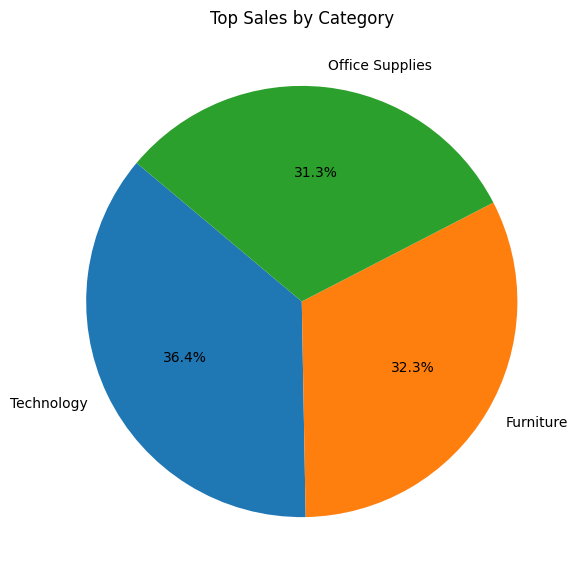

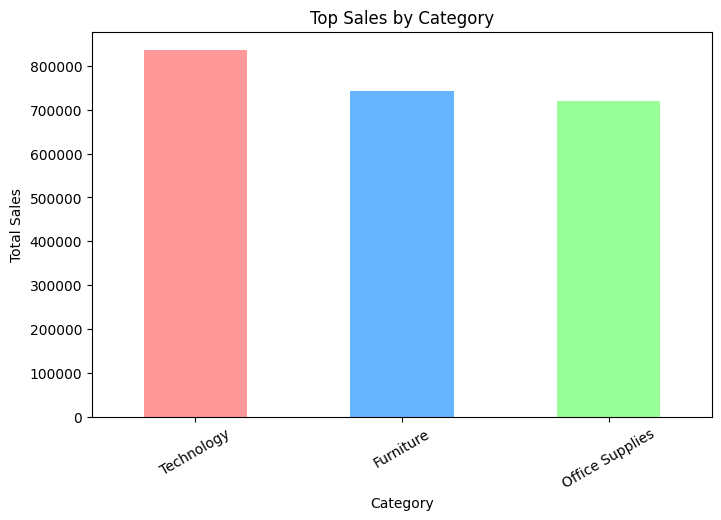

In [26]:
import matplotlib.pyplot as plt

# Aggregate sales by category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Pie chart (optional)
plt.figure(figsize=(7,7))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Top Sales by Category')
plt.show()

# Bar chart with different colors for each category
colors = ['#ff9999','#66b3ff','#99ff99']  # one color per category
plt.figure(figsize=(8,5))
category_sales.plot(kind='bar', color=colors)
plt.ylabel('Total Sales')
plt.title('Top Sales by Category')
plt.xticks(rotation=30)
plt.show()


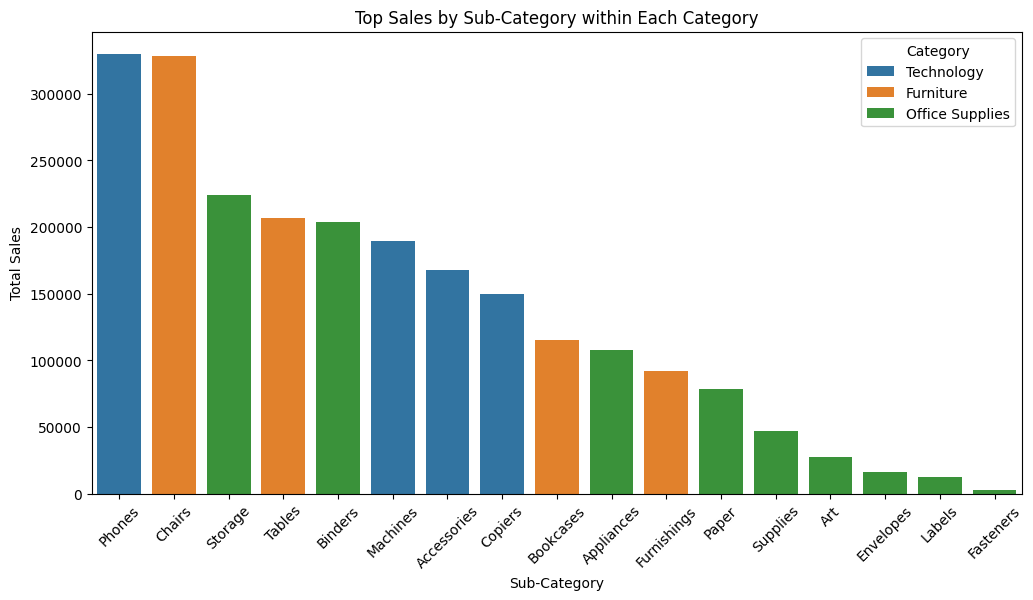

In [28]:
# Aggregate sales by Category and Sub-Category
subcat_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().sort_values(ascending=False)
subcat_sales
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(x=subcat_sales.index.get_level_values('Sub-Category'), 
            y=subcat_sales.values, 
            hue=subcat_sales.index.get_level_values('Category'))
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.title('Top Sales by Sub-Category within Each Category')
plt.show()


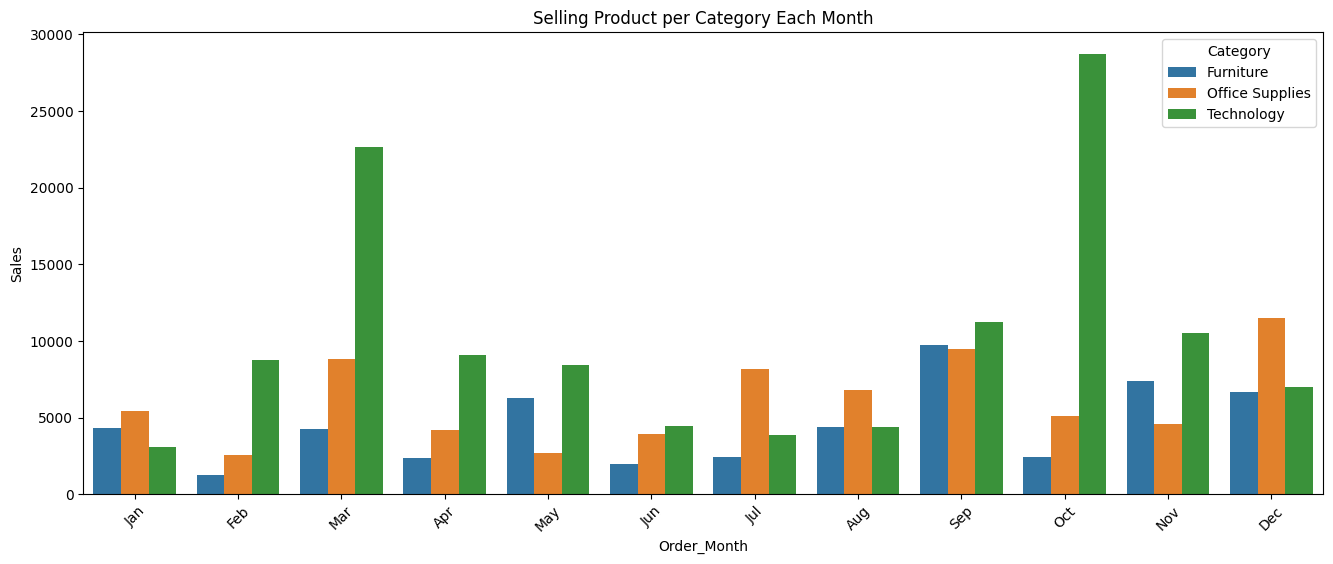

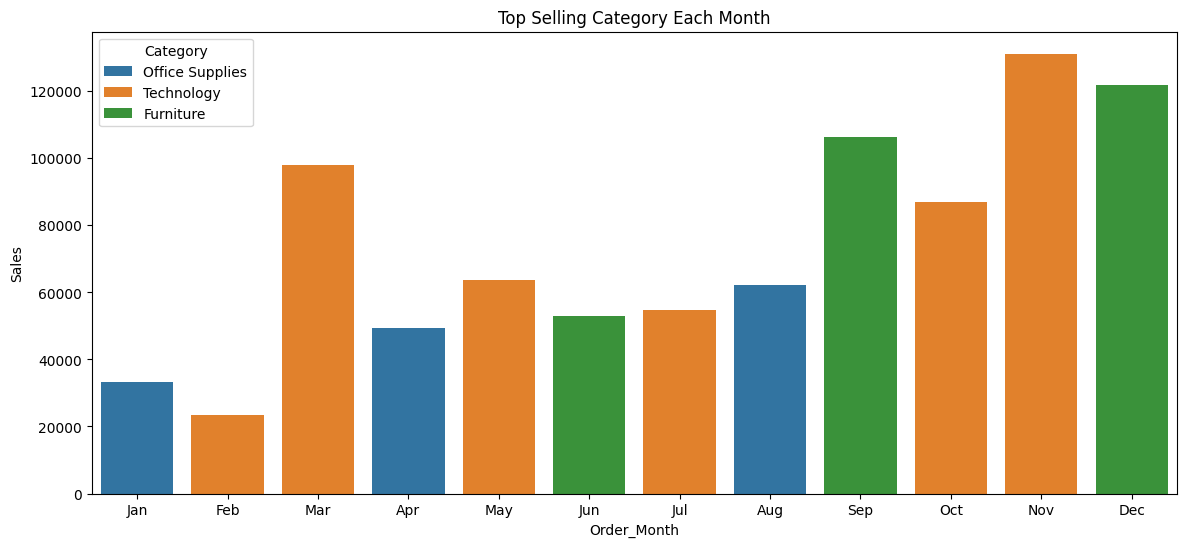

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Extract month name (once)
df['Order_Month'] = df['Order Date'].dt.strftime('%b')

# 2️⃣ Define calendar order for months
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df['Order_Month'] = pd.Categorical(df['Order_Month'], categories=month_order, ordered=True)

# 3️⃣ Top-selling product per category per month
monthly_product_sales = df.groupby(['Order_Month', 'Category', 'Product Name'], observed=True)['Sales'].sum().reset_index()
top_product_per_month = monthly_product_sales.loc[
    monthly_product_sales.groupby(['Order_Month', 'Category'], observed=True)['Sales'].idxmax()
].sort_values('Order_Month')


# Plot top product per category per month
plt.figure(figsize=(16,6))
sns.barplot(x='Order_Month', y='Sales', hue='Category', data=top_product_per_month)
plt.ylabel('Sales')
plt.title('Selling Product per Category Each Month')
plt.xticks(rotation=45)
plt.show()

# 4️⃣ Top-selling category per month
monthly_category_sales = df.groupby(['Order_Month', 'Category'], observed=True)['Sales'].sum().reset_index()
top_category_per_month = monthly_category_sales.loc[
    monthly_category_sales.groupby('Order_Month', observed=True)['Sales'].idxmax()
].sort_values('Order_Month')


# Plot top category per month
plt.figure(figsize=(14,6))
sns.barplot(x='Order_Month', y='Sales', hue='Category', data=top_category_per_month)
plt.ylabel('Sales')
plt.title('Top Selling Category Each Month')
plt.show()




C:\Users\MAJID ALI\AppData\Local\Temp\ipykernel_8324\1871041911.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()  # remove duplicate legend


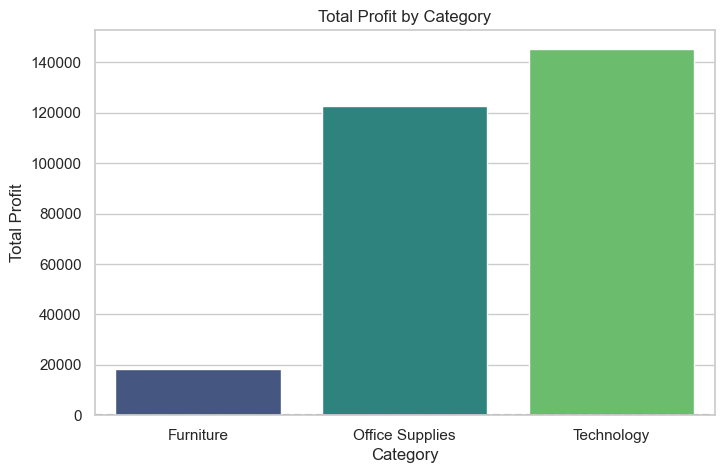

C:\Users\MAJID ALI\AppData\Local\Temp\ipykernel_8324\1871041911.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=total_summary, palette='Set2')


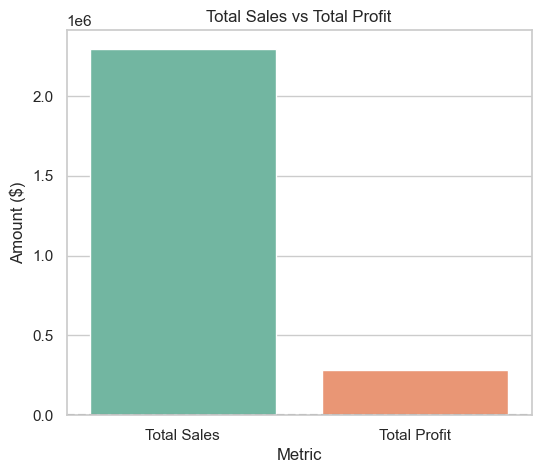

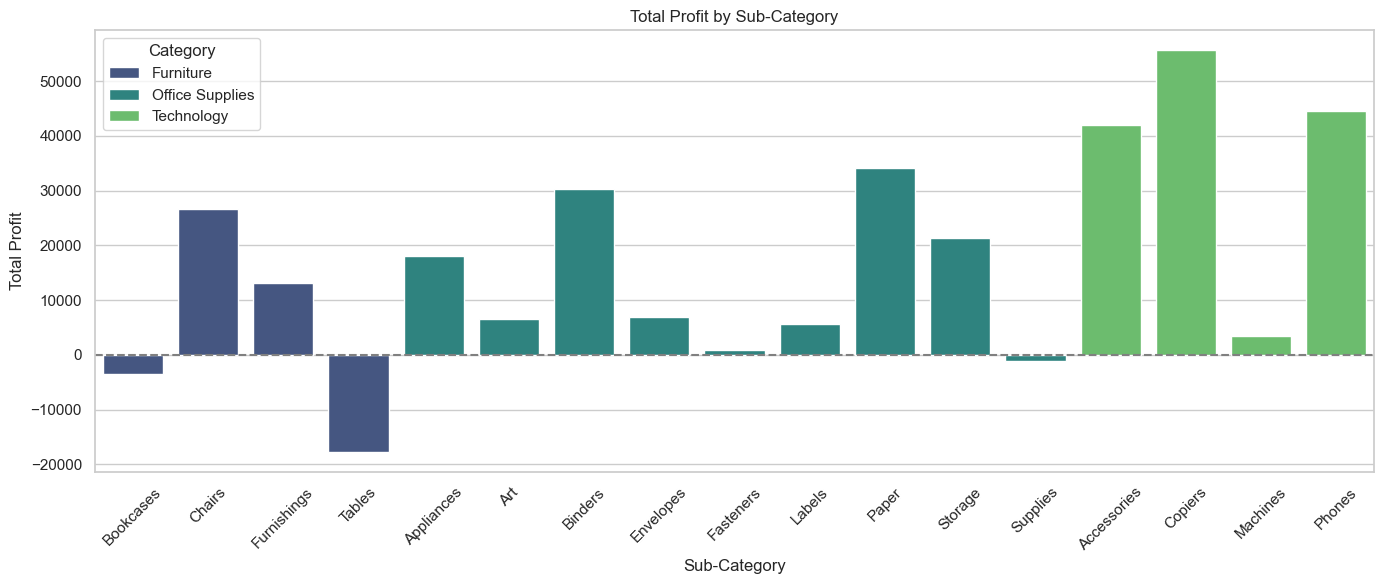

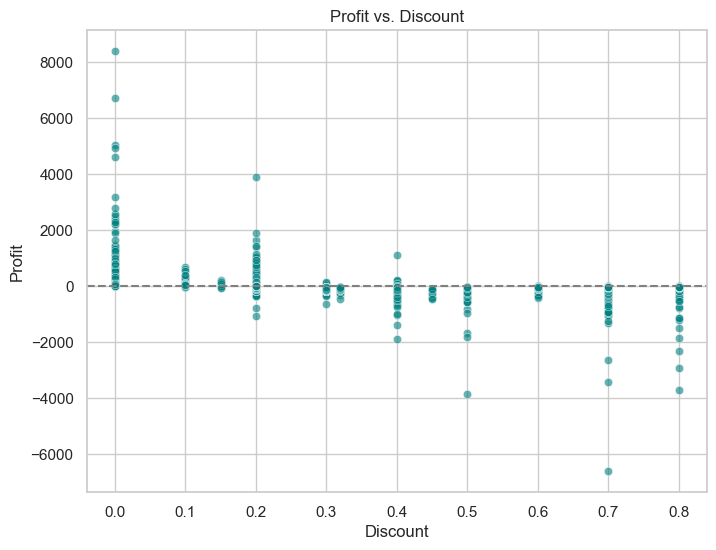

C:\Users\MAJID ALI\AppData\Local\Temp\ipykernel_8324\1871041911.py:77: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


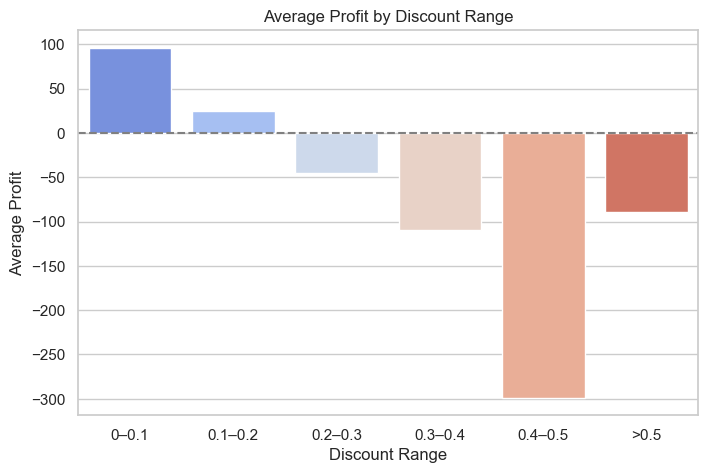

C:\Users\MAJID ALI\AppData\Local\Temp\ipykernel_8324\1871041911.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


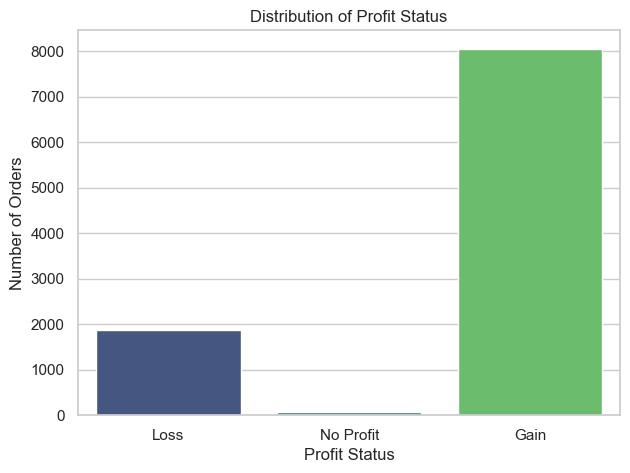

In [93]:
# 📊 FULL PROFIT & LOSS ANALYSIS (UPDATED)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# ==========================
# 1️⃣ PROFIT BY CATEGORY
# ==========================
category_profit = df.groupby('Category', observed=True)['Profit'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Profit', hue='Category', data=category_profit, palette='viridis', dodge=False)
plt.title('Total Profit by Category')
plt.ylabel('Total Profit')
plt.axhline(0, color='gray', linestyle='--')
plt.legend().remove()  # remove duplicate legend
plt.show()

#============================
# ==========================
# TOTAL SALES & PROFIT GRAPH
# ==========================
total_summary = pd.DataFrame({
    'Metric': ['Total Sales', 'Total Profit'],
    'Value': [df['Sales'].sum(), df['Profit'].sum()]
})

plt.figure(figsize=(6,5))
sns.barplot(x='Metric', y='Value', data=total_summary, palette='Set2')
plt.title('Total Sales vs Total Profit')
plt.ylabel('Amount ($)')
plt.axhline(0, color='gray', linestyle='--')
plt.show()

# ==========================
# 2️⃣ PROFIT BY SUB-CATEGORY
# ==========================
subcategory_profit = df.groupby(['Category', 'Sub-Category'], observed=True)['Profit'].sum().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(x='Sub-Category', y='Profit', hue='Category', data=subcategory_profit, palette='viridis')
plt.title('Total Profit by Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

# ==========================
# 3️⃣ PROFIT vs DISCOUNT
# ==========================
plt.figure(figsize=(8,6))
sns.scatterplot(x='Discount', y='Profit', data=df, alpha=0.6, color='teal')
plt.title('Profit vs. Discount')
plt.ylabel('Profit')
plt.xlabel('Discount')
plt.axhline(0, color='gray', linestyle='--')
plt.show()

# Bin discounts into ranges
df['Discount_Range'] = pd.cut(df['Discount'],
    bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 1],
    labels=['0–0.1','0.1–0.2','0.2–0.3','0.3–0.4','0.4–0.5','>0.5']
)

discount_profit = df.groupby('Discount_Range', observed=True)['Profit'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='Discount_Range', y='Profit', hue='Discount_Range', data=discount_profit, palette='coolwarm', dodge=False)
plt.title('Average Profit by Discount Range')
plt.ylabel('Average Profit')
plt.xlabel('Discount Range')
plt.axhline(0, color='gray', linestyle='--')
plt.legend().remove()
plt.show()

# ==========================
# 4️⃣ PROFIT STATUS DISTRIBUTION
# ==========================
df['Profit_Status'] = pd.cut(
    df['Profit'],
    bins=[df['Profit'].min(), -0.01, 0.01, df['Profit'].max()],
    labels=['Loss', 'No Profit', 'Gain']
)

profit_status_count = df['Profit_Status'].value_counts().reset_index()
profit_status_count.columns = ['Profit_Status', 'Count']

plt.figure(figsize=(7,5))
sns.barplot(x='Profit_Status', y='Count', hue='Profit_Status', data=profit_status_count, palette='viridis', dodge=False)
plt.title('Distribution of Profit Status')
plt.ylabel('Number of Orders')
plt.xlabel('Profit Status')
plt.legend().remove()
plt.show()


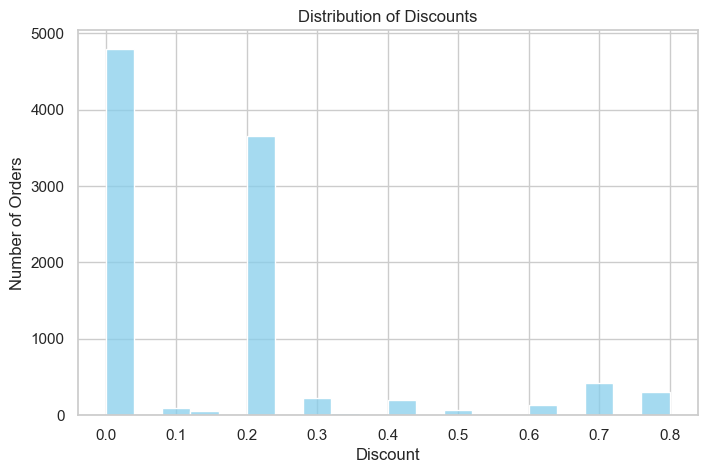

C:\Users\MAJID ALI\AppData\Local\Temp\ipykernel_8324\3328407059.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Discount_Range', y='Profit', data=discount_profit, palette='coolwarm')


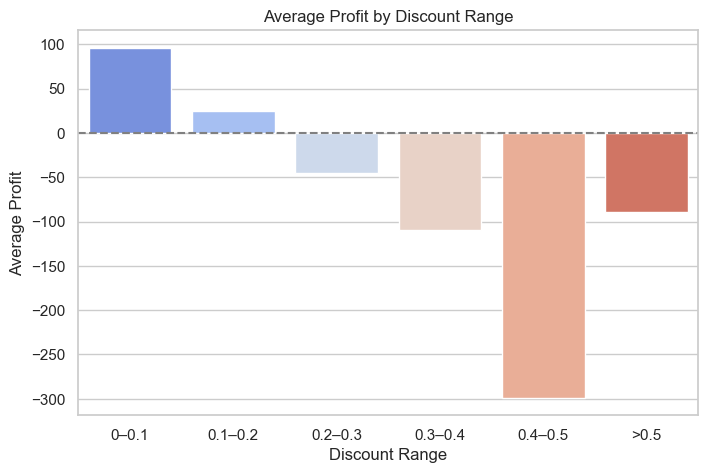

C:\Users\MAJID ALI\AppData\Local\Temp\ipykernel_8324\3328407059.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Discount_Range', y='Sales', data=discount_sales, palette='magma')


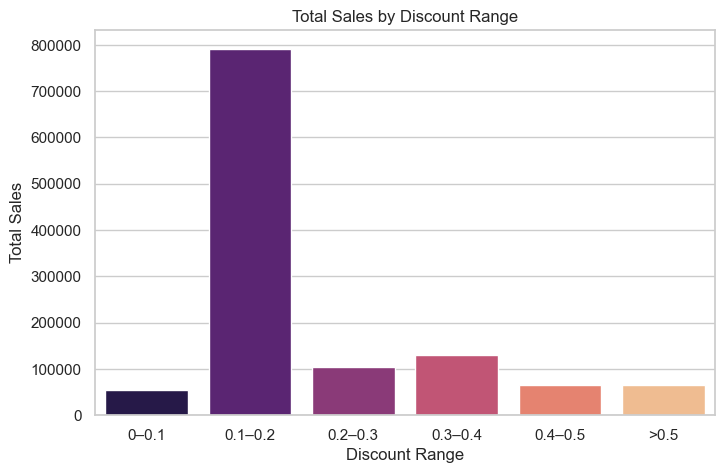

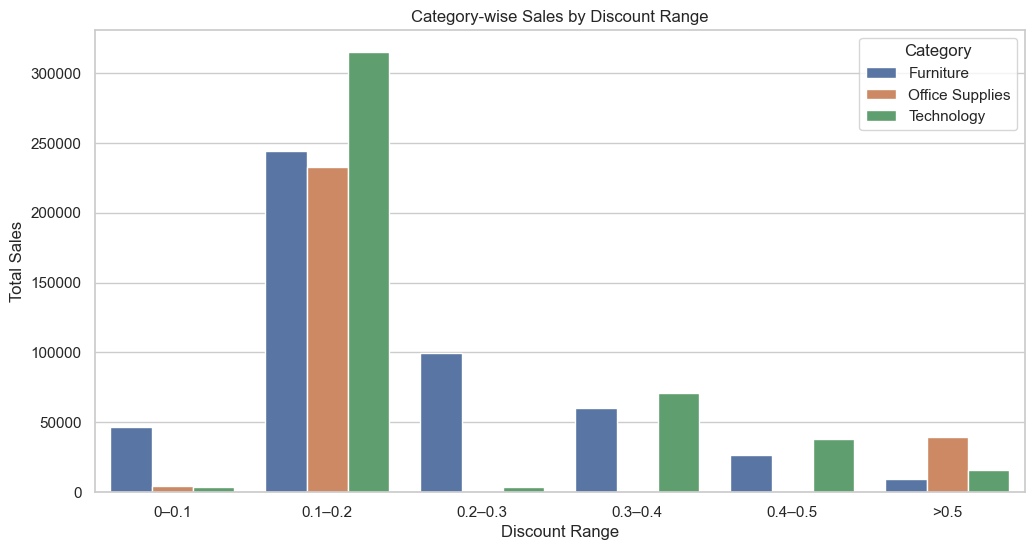

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ---- Prepare Discount Ranges ----
df['Discount_Range'] = pd.cut(
    df['Discount'], 
    bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 1], 
    labels=['0–0.1','0.1–0.2','0.2–0.3','0.3–0.4','0.4–0.5','>0.5']
)

# ---- 1️⃣ Discount Distribution ----
plt.figure(figsize=(8,5))
sns.histplot(df['Discount'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of Discounts')
plt.xlabel('Discount')
plt.ylabel('Number of Orders')
plt.show()

# ---- 2️⃣ Average Profit by Discount Range ----
discount_profit = df.groupby('Discount_Range', observed=True)['Profit'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='Discount_Range', y='Profit', data=discount_profit, palette='coolwarm')
plt.title('Average Profit by Discount Range')
plt.xlabel('Discount Range')
plt.ylabel('Average Profit')
plt.axhline(0, color='gray', linestyle='--')
plt.show()

# ---- 3️⃣ Total Sales by Discount Range ----
discount_sales = df.groupby('Discount_Range', observed=True)['Sales'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='Discount_Range', y='Sales', data=discount_sales, palette='magma')
plt.title('Total Sales by Discount Range')
plt.xlabel('Discount Range')
plt.ylabel('Total Sales')
plt.show()

# ---- 4️⃣ Category-wise Sales by Discount Range ----
category_discount = df.groupby(['Category', 'Discount_Range'], observed=True)['Sales'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='Discount_Range', y='Sales', hue='Category', data=category_discount)
plt.title('Category-wise Sales by Discount Range')
plt.xlabel('Discount Range')
plt.ylabel('Total Sales')
plt.show()


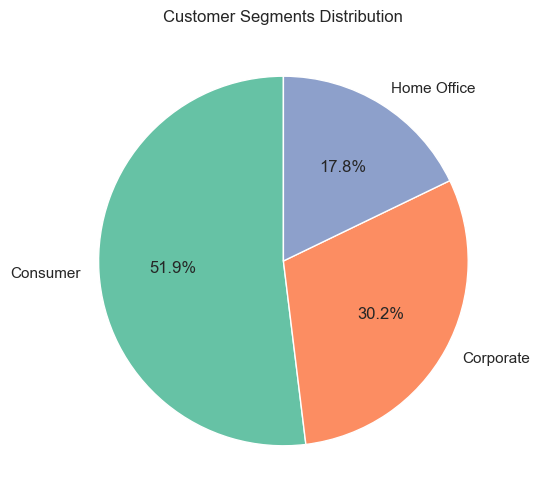

C:\Users\MAJID ALI\AppData\Local\Temp\ipykernel_8324\2079185755.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Profit', data=segment_profit, palette='viridis')


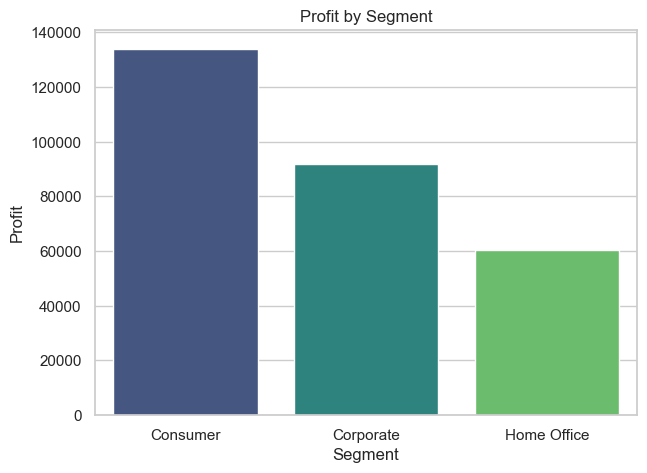

C:\Users\MAJID ALI\AppData\Local\Temp\ipykernel_8324\2079185755.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Profit', data=category_profit, palette='viridis')


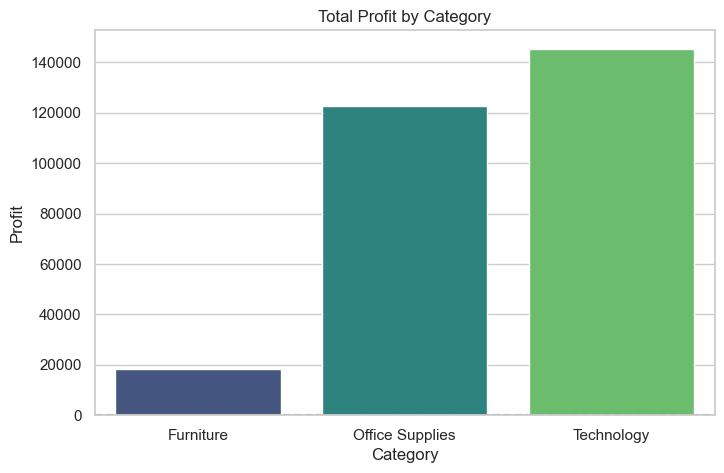

C:\Users\MAJID ALI\AppData\Local\Temp\ipykernel_8324\2079185755.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Sales', data=category_sales, palette='Blues_d')


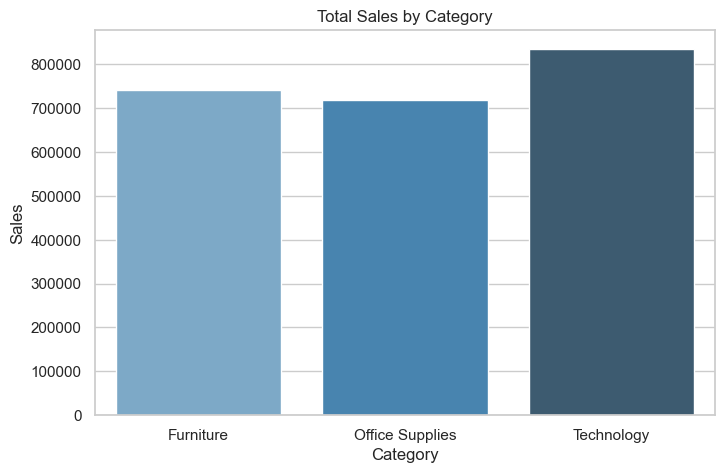

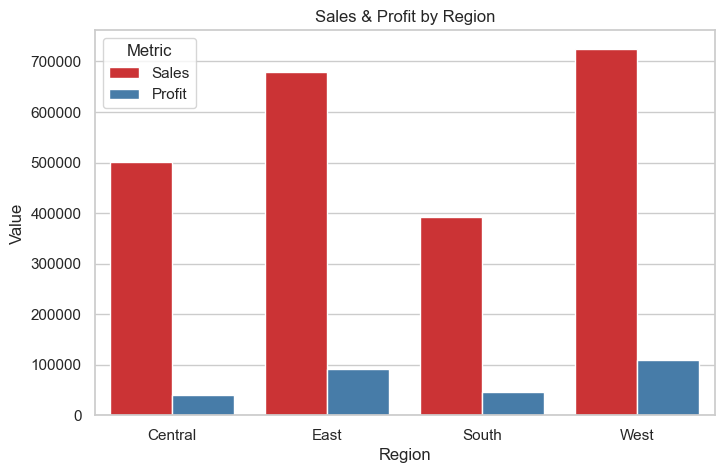

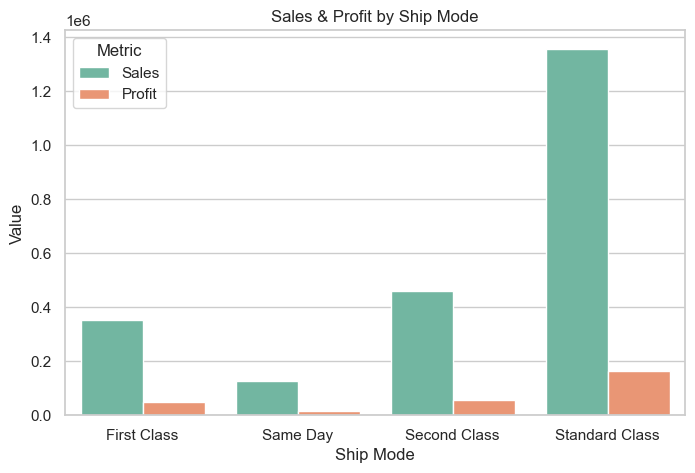

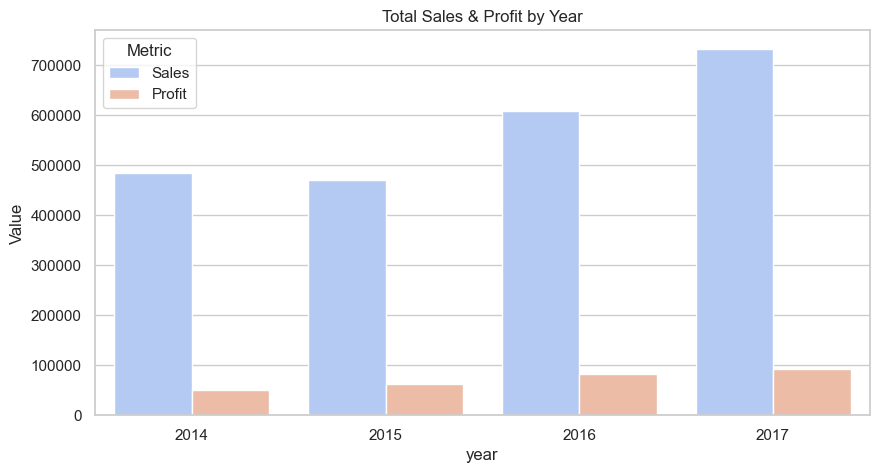

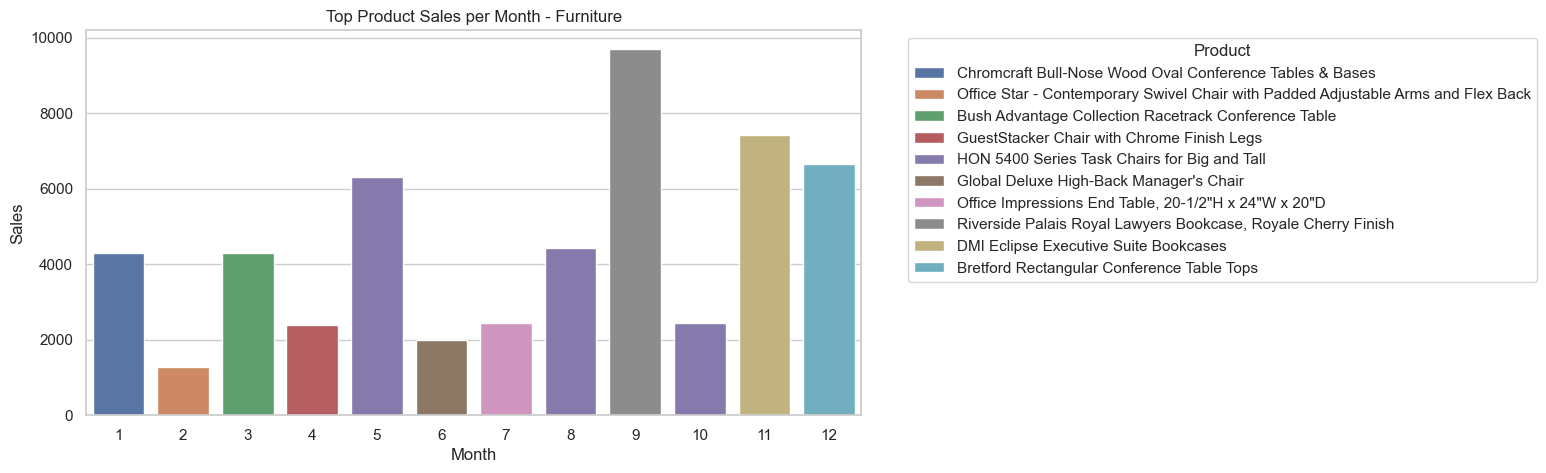

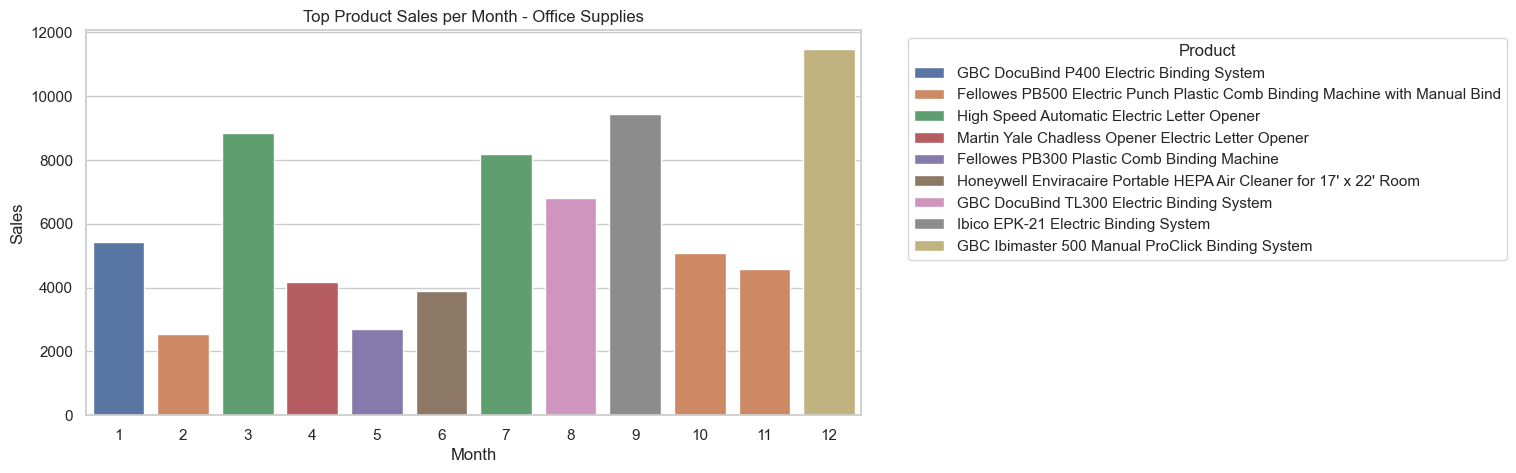

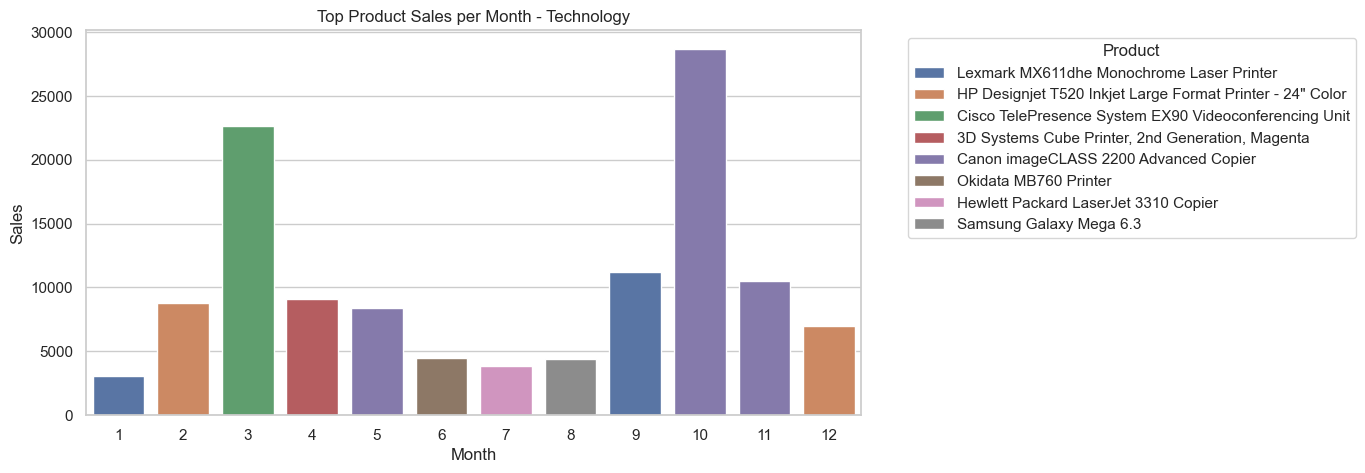

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# Ensure Order Date is datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.month

# ==========================
# 1️⃣ Pie Chart: Segment Counts
# ==========================
plt.figure(figsize=(6,6))
df['Segment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Customer Segments Distribution')
plt.ylabel('')
plt.show()

# ==========================
# 2️⃣ Profit by Segment
# ==========================
segment_profit = df.groupby('Segment')['Profit'].sum().reset_index()
plt.figure(figsize=(7,5))
sns.barplot(x='Segment', y='Profit', data=segment_profit, palette='viridis')
plt.title('Profit by Segment')
plt.ylabel('Profit')
plt.show()

# ==========================
# 3️⃣ Profit & Sales by Category
# ==========================
category_profit = df.groupby('Category')['Profit'].sum().reset_index()
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Profit', data=category_profit, palette='viridis')
plt.title('Total Profit by Category')
plt.axhline(0, color='gray', linestyle='--')
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Sales', data=category_sales, palette='Blues_d')
plt.title('Total Sales by Category')
plt.show()

# ==========================
# 4️⃣ Profit & Sales by Region
# ==========================
region_stats = df.groupby('Region')[['Sales','Profit']].sum().reset_index()
region_stats_melt = region_stats.melt(id_vars='Region', value_vars=['Sales','Profit'], var_name='Metric', value_name='Value')

plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Value', hue='Metric', data=region_stats_melt, palette='Set1')
plt.title('Sales & Profit by Region')
plt.show()

# ==========================
# 5️⃣ Sales & Profit by Ship Mode
# ==========================
ship_stats = df.groupby('Ship Mode')[['Sales','Profit']].sum().reset_index()
ship_stats_melt = ship_stats.melt(id_vars='Ship Mode', value_vars=['Sales','Profit'], var_name='Metric', value_name='Value')

plt.figure(figsize=(8,5))
sns.barplot(x='Ship Mode', y='Value', hue='Metric', data=ship_stats_melt, palette='Set2')
plt.title('Sales & Profit by Ship Mode')
plt.show()

# ==========================
# 6️⃣ Total Sales & Profit by Year
# ==========================
year_stats = df.groupby('year')[['Sales','Profit']].sum().reset_index()
year_stats_melt = year_stats.melt(id_vars='year', value_vars=['Sales','Profit'], var_name='Metric', value_name='Value')

plt.figure(figsize=(10,5))
sns.barplot(x='year', y='Value', hue='Metric', data=year_stats_melt, palette='coolwarm')
plt.title('Total Sales & Profit by Year')
plt.show()

# ==========================
# 7️⃣ Top Product per Category per Month
# ==========================
top_products = df.groupby(['Category','month','Product Name'])['Sales'].sum().reset_index()
top_products = top_products.sort_values(['Category','month','Sales'], ascending=[True,True,False])
top_products = top_products.groupby(['Category','month']).head(1).reset_index(drop=True)

# Plotting top product sales per category per month
categories = df['Category'].unique()
for cat in categories:
    cat_data = top_products[top_products['Category'] == cat]
    plt.figure(figsize=(10,5))
    sns.barplot(x='month', y='Sales', hue='Product Name', data=cat_data)
    plt.title(f'Top Product Sales per Month - {cat}')
    plt.ylabel('Sales')
    plt.xlabel('Month')
    plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


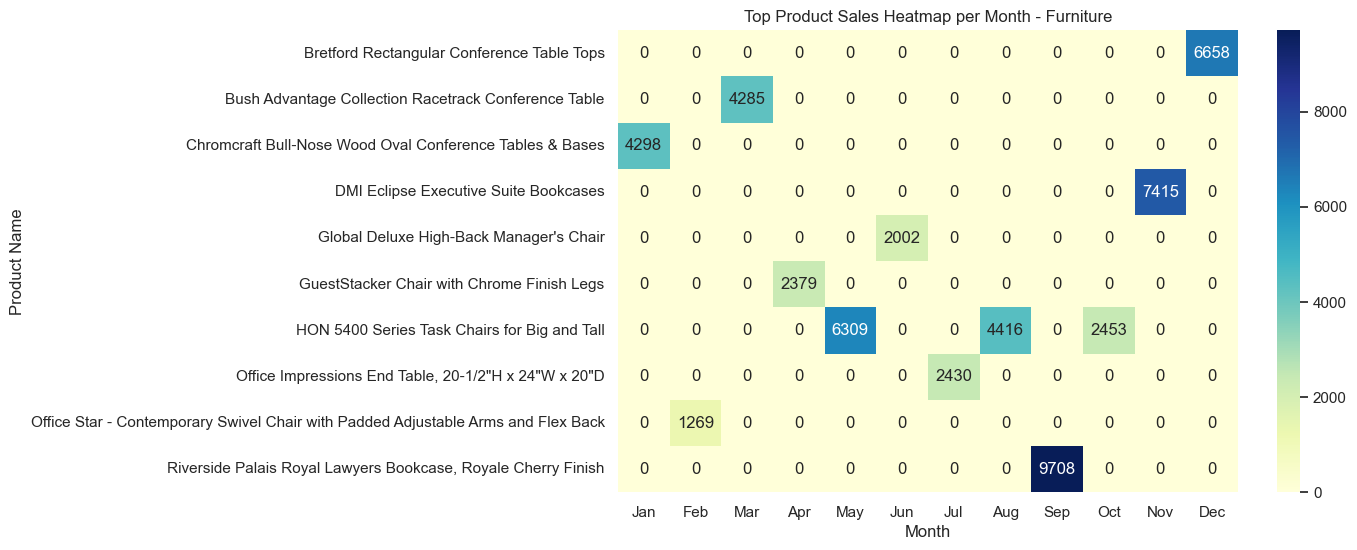

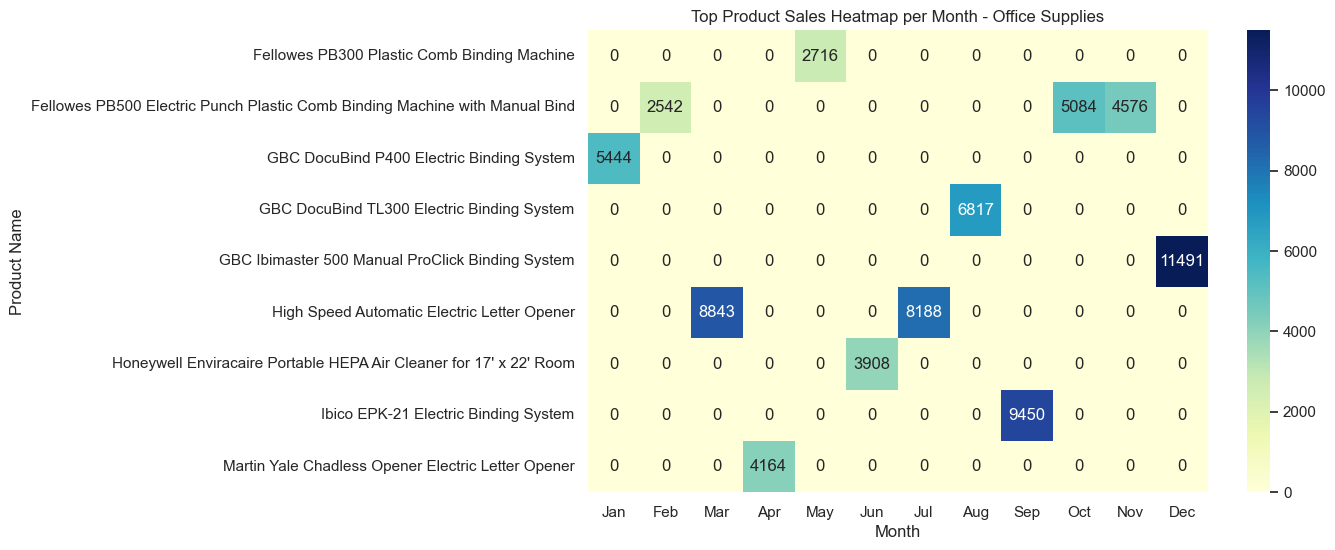

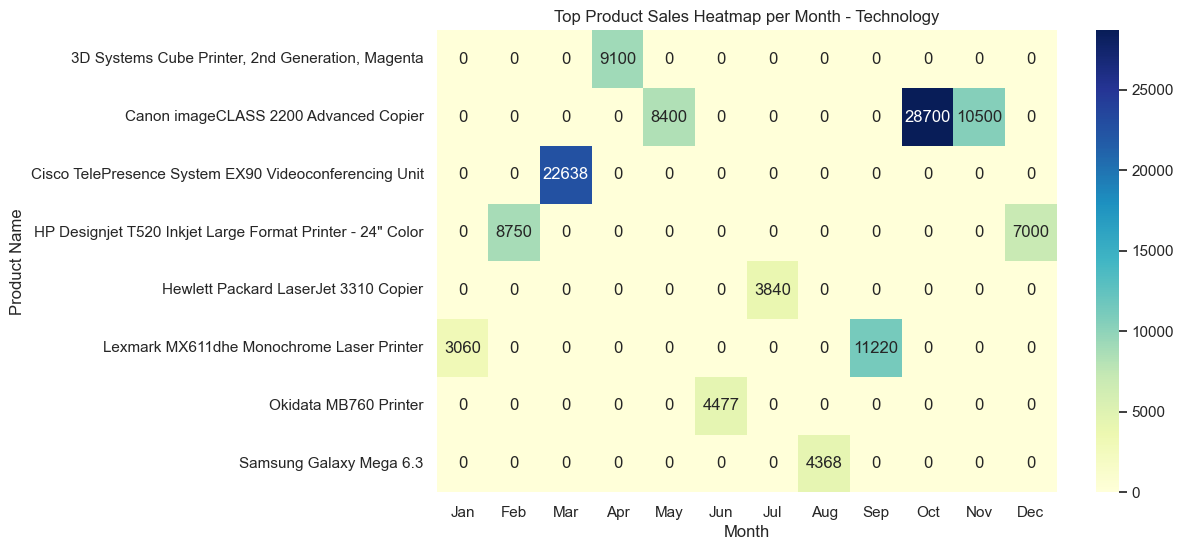

In [95]:
# ==========================
#  Top Products per Category per Month (Heatmap)
# ==========================
top_products = df.groupby(['Category','month','Product Name'], observed=True)['Sales'].sum().reset_index()
top_products = top_products.sort_values(['Category','month','Sales'], ascending=[True,True,False])
top_products = top_products.groupby(['Category','month'], observed=True).head(1).reset_index(drop=True)

categories = df['Category'].unique()
for cat in categories:
    cat_data = top_products[top_products['Category'] == cat]
    heatmap_data = cat_data.pivot(index='Product Name', columns='month', values='Sales').fillna(0)
    
    plt.figure(figsize=(10,6))
    sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='YlGnBu')
    plt.title(f'Top Product Sales Heatmap per Month - {cat}')
    plt.ylabel('Product Name')
    plt.xlabel('Month')
    plt.show()
